# scikit_learn oder sklearn als ML Bibliothek
<br><br><img width=500 height=500 class="imgright" src="Images/machine_learning.png"><br><br>
scikit-learn oder sklearn ist ein freies ML Modul für Python. Es ist auf die Zusammenarbeit mit NumPy, Matplotlib und Pandas ausgelegt und ist Laufzeit-optimiert. Es enthält zahlreiche Algorithmen für überwachtes und unüberwachtes Lernen. Neben einigen Methoden zur Datenmanipulation enthält es vor allem Algorithmen zur Klassifikation, Regression und zum Clustering. Wir werden uns jetzt mit sklearn und seinen Möglichkeiten anhand von Beispielen beschäftigen, nachdem wir ein grundlegendes Verständnis für einige Methoden schon aus unseren Kernpython Beispielen erworben haben, und auch die "Hilfsprogramme" Numpy, Matplotlib und Pandas in den Grundzügen kennen. Wir werden sehen, wie leicht es mit diesem Modul ist, auch anspruchsvollere ML Anwendungen zu implementieren. Um weiter in sklearn einzudringen empfehlen wir https://scikit-learn.org/stable/ als Dokumentation.

Wenn wir sklearn importieren, übernehmen wir normalerweise nur die Untermodule, die wir wirklich brauchen, und nicht das ganze sehr umfangreiche Modul. Wir werden nun zunächst uns mit der <b>Aufbereiten unserer Rohdaten</b> beschäftigen und hierfür das preprocessing Untermodul verwenden. Wir werden dann die Techniken der Binarisierung (Schwellenwertverfahren), Nullung des Mittelwertes, der Skalierung und der Normalisation an einem Beispiel-Array demonstrieren.

In [1]:
from sklearn import preprocessing
import numpy as np
data=np.array([
    [3.4,2.1,6.3],
    [-2.3,4.5,-6.1],
    [4.0,1.9,2.1],
    [-10.2,8.8,4.0]
    
])
print(f"Ausgangsdaten:\n{data}\n")


#Schwellenwertverfahren zum Verwandeln der Daten in Binärdaten mit Schwellenwert
bin_data=preprocessing.Binarizer(threshold=3).transform(data)
print(f"Binarisiert mit Schwelle 3:\n{bin_data}\n")

#Entfernung des Mittelwertes zur Zentrierung auf 0
print(f"Mittelwert und Standardabweichung\n aller Daten vor Mittelwertnullung: {data.mean():5.2f}  {data.std():5.2f}")
data_minus_mean=preprocessing.scale(data)
print(f"Mittelwert und Standardabweichung\n aller Daten nach Mittelwertnullung: {data_minus_mean.mean():5.2f}  {data_minus_mean.std():5.2f}")
print("\n",data_minus_mean,"\n")

#Skalierung, jede Spalte!!! und damit jede Feature
data_scaler=preprocessing.MinMaxScaler(feature_range=(0,5)) #erzeuge Skalierer
data_scaled=data_scaler.fit_transform(data)
print(f"auf Bereich zwischen 0 und 5 skalierte Spalten:\n {np.round(data_scaled,2)}\n")

#Normalisierung auf 1 kleinste absolute Abweichungsmethode Summe der Absolutwerte der Spalten ist 1
data_n1=preprocessing.normalize(data,norm="l1")
print(f"Spaltenabsolutwerte normalisiert auf 1:\n {data_n1}\n")
#Normalisierung auf 1 mit Quadratensummen , diese sind in jeder Spalte 1
data_n2=preprocessing.normalize(data,norm="l2")
print(f"Spaltenquadrat Summe normalisiert auf 1:\n {data_n2}\n")
#print(np.sum(data_n2[:1]**2)) #test ob Spaltenquadratsumme 0

Ausgangsdaten:
[[  3.4   2.1   6.3]
 [ -2.3   4.5  -6.1]
 [  4.    1.9   2.1]
 [-10.2   8.8   4. ]]

Binarisiert mit Schwelle 3:
[[1. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 1.]]

Mittelwert und Standardabweichung
 aller Daten vor Mittelwertnullung:  1.54   5.09
Mittelwert und Standardabweichung
 aller Daten nach Mittelwertnullung:  0.00   1.00

 [[ 0.81882978 -0.80069779  1.01089757]
 [-0.17952953  0.06297623 -1.64203996]
 [ 0.92392024 -0.87267063  0.11232195]
 [-1.5632205   1.61039219  0.51882044]] 

auf Bereich zwischen 0 und 5 skalierte Spalten:
 [[4.79 0.14 5.  ]
 [2.78 1.88 0.  ]
 [5.   0.   3.31]
 [0.   5.   4.07]]

Spaltenabsolutwerte normalisiert auf 1:
 [[ 0.28813559  0.1779661   0.53389831]
 [-0.17829457  0.34883721 -0.47286822]
 [ 0.5         0.2375      0.2625    ]
 [-0.44347826  0.3826087   0.17391304]]

Spaltenquadrat Summe normalisiert auf 1:
 [[ 0.45572968  0.2814801   0.84444029]
 [-0.29034943  0.56807496 -0.77005717]
 [ 0.81615659  0.38767438  0.42848221]
 [-0.7258361

Diese verschiedenen Arten der Datenvorbereitung dienen dazu, die Rohdaten, die ja für jedes Feature sehr unterschiedliche Bereiche und Verteilungen haben können, auf ein gemeinsames Level zu bringen, damit sie bezüglich der Skala vergleichbar werden und somit z.B. der Einfluß jedes Features auf das Ergebnis überhaupt abschätzbar werden, z.B. über die Grösse der optimierten Gewichte. Man sieht, daß entweder alle Daten auf einmal auf bestimmte Werte gebracht werden, wie beim Schwellenwertverfahren oder der Mittelwertnullung, aber die anderen Verfahren Spaltenweise wirken, also jeweils auf ein Feature einzeln. Bei der Normalisierung ist die Methode mit den Spaltenabsolutwerten robuster gegenüber Ausreißern, hingegen betont die Methode der Spaltenquadrat Summen Ausreißer stärker, sie sollte verwendet werden, wenn wir sicher sind, daß eventuelle Ausreißer wirklich Bedeutung haben und nicht durch fehlerhafte Datenerfassung entstehen.

Oft müssen wir kategorische Label in numerische Werte umwandeln. Hierzu dient das Encoder Objekt von sklearn. Nehmen wir an, die Label seien "Pferd", "Esel", "Maultier" und "Pony". Wir wollen diese Label z.B. für einen Kategorisator in Zahlen umwandeln.

In [2]:
labels=np.array(["Pferd", "Esel", "Maultier","Pony"])
Umwandler=preprocessing.LabelEncoder() #Objekt initialisieren
Umwandler.fit(labels) #wende Encoder auf die lables an
num_labels=Umwandler.transform(labels) #transformiere numerisch

print(f"Labels: {labels}  Labels numerisch: {num_labels}\n") #die numerischen Label entsprechen der alphabetischen Reihenfolge

zurück=Umwandler.inverse_transform(num_labels) #zurück transformieren
print(f"Dasselbe andersherum: {zurück}")

Labels: ['Pferd' 'Esel' 'Maultier' 'Pony']  Labels numerisch: [2 0 1 3]

Dasselbe andersherum: ['Pferd' 'Esel' 'Maultier' 'Pony']


Auch mit fehlenden Daten müssen wir umgehen. Sie werden in NumPy Arrays meist mit np.nan für "not a number" kodiert, aber auch andere unverwechselbare Kodierungen wie z.B. -1, wenn alle Elemete positive Zahlen sind oder 0, wenn diese Zahl in den Datensätzen sonst nicht vorkommt. Wir können natürlich alle Datensätze mit solchen Einträgen wie np.nan löschen, aber gelegentlich wird dadurch der Gesamtdatensatz zu klein. Hier bietet sklearn mit dem ```SimpleImputer``` ein entsprechendes Objekt in Untermodul ```impute``` an. Hier werden verschiedene Strategien angeboten, mit denen man solche Lücken auffüllen kann. Mit "mean" wird der fehlende Wert jeweils auf den Mittelwert der jeweiligen Spalte gesetzt. Strings, wie "leer" oder "missing" können aber damit nicht verarbeitet werden. Sie müssen vorher in NumPy in np.nan umgewandelt werden.

In [3]:
a=np.array([1,2,"leer"])
a[2]
a[a=="leer"]=np.nan
print(a)

['1' '2' 'nan']


Ein sogenannter Imputer kann "missing values" für einzelne Samples ersetzen, z.B. indem der Zeilenmittelwert angenommen wird.

In [4]:
a=np.array([[  1.,   4.,   2.,       6.],
           [  10.,   6.,  np.nan,    8.],
           [  10.,  12.,  14.,   np.nan]])

from sklearn.impute import SimpleImputer
Imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
Imputer = Imputer.fit(a) #Objekt an Daten anpassen
korr_data = Imputer.transform(a) #Daten transformieren
print(f" Korrigierte Daten: \n {korr_data} \n In Spalte 2 ist der Mittelwert 8 , in Spalte 3 ist er 7") 

 Korrigierte Daten: 
 [[ 1.  4.  2.  6.]
 [10.  6.  8.  8.]
 [10. 12. 14.  7.]] 
 In Spalte 2 ist der Mittelwert 8 , in Spalte 3 ist er 7


Nachdem wir uns jetzt kurz mit der Datenvorbereitung beschäftigt haben, wollen wir jetzt einen Kategorizierer mit Logistischer Regression demostrieren, wie wir ihn beim Kapitel binärer Klassifikator schon prinzipiell kennengelernt haben, hier wollen wir aber mit 3 verschiedenen Label arbeiten. Hierzu verwenden wir das berühmte Iris Blumen Datenset, quasi die Mutter aller Datesätze, welches in sklearn heruntergeladen werden kann. Es besteht aus 150 Einträgen von jeweils 4 Messwerten, die vom Biologen Ronald Fisher 1936 zusammengestellt wurden. Die Features sind die Kelchblattbreite und -länge der Blüten, sowie die Blütenblattlänge und -breite. Nach diesen Messwerten hat Fisher dann die Pflanzen jeweils 3 Spezies zugeordnet:
Iris setosa, Iris virginica und Iris versicolor, die im Datenset mit 0,1,2 kodiert sind. Jeweils 50 Beispiele finden sich in den Daten.<br>
<br><b>Iris setosa<br><img width=300 height=200 class="imgright" src="Images/Iris_setosa.jpg"><br><br>
<br>Iris virginica<br><img width=300 height=200 class="imgright" src="Images/Iris_virginica.jpg"><br><br>
<br>Iris versicolor<br><img width=300 height=200 class="imgright" src="Images/Iris_versicolor.jpg"><br><br>
<br>Kelch- und Blütenblätter<br><img width=700 height=500 class="imgright" src="Images/SepalPetal.png"><br><br>
Zunächst verschaffen wir uns einen Überblick über die Daten.

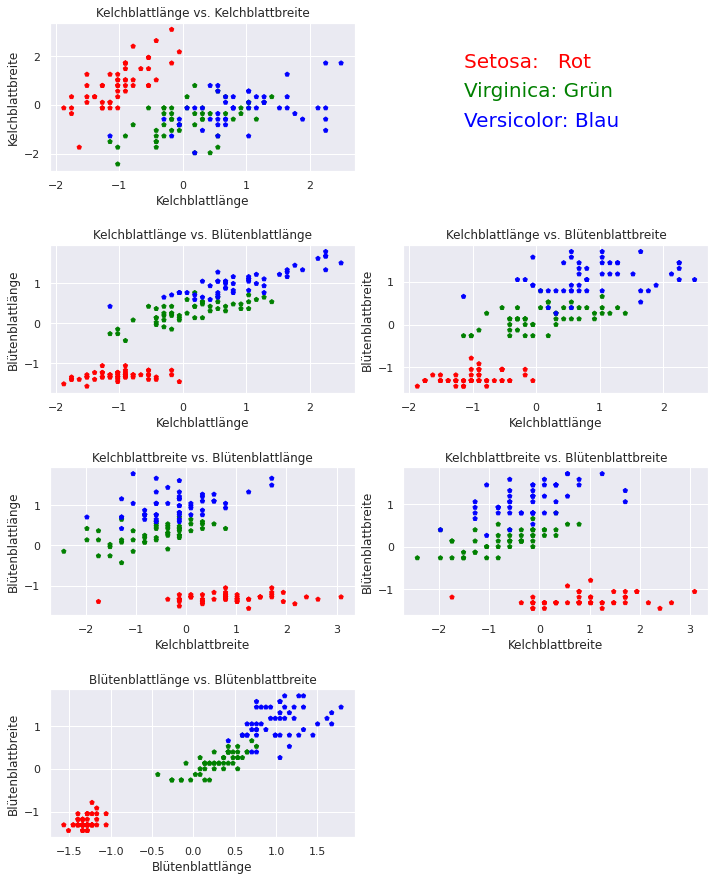

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn import preprocessing
import seaborn as sns
sns.set()

data= datasets.load_iris()
X = np.array(data.data[:,:4]) #Features Spalte 0: Kelchblattlänge, 1: Kelchblattbreite, 2: Blütenblattlänge , 3: Blütenblattbreite
y = np.array(data.target) #Labels


scaler = preprocessing.StandardScaler().fit(X) #Daten skalieren
X = scaler.transform(X)

kl,kb,bl,bb=X[:,0],X[:,1],X[:,2],X[:,3]

fig, ax = plt.subplots(4, 2, figsize=(10,12)) ##figsize bestimmt eine identische Größe für alle Einzelplots
 

fig.tight_layout()
fig.subplots_adjust(hspace=.5) ### genug Abstand um alle Achsen mit Beschriftung abzubilden ###

colormap=np.array(["red","green","blue"])
plt.subplot(4,2,1) 
plt.scatter(X[:,0], X[:,1], s=20, c=colormap[y], marker="p") 
plt.title("Kelchblattlänge vs. Kelchblattbreite")
plt.xlabel("Kelchblattlänge")
plt.ylabel("Kelchblattbreite")

plt.subplot(4,2,2) 
plt.text(.2,.7,"Setosa:   Rot",fontsize=20,color="red")
plt.text(.2,.5,"Virginica: Grün",fontsize=20,color="green")
plt.text(.2,.3,"Versicolor: Blau",fontsize=20,color="blue")
plt.axis("off")

plt.subplot(4,2,3)
plt.scatter(X[:,0], X[:,2], s=20, c=colormap[y], marker="p") 
plt.title("Kelchblattlänge vs. Blütenblattlänge")
plt.xlabel("Kelchblattlänge")
plt.ylabel("Blütenblattlänge")

plt.subplot(4,2,4) 
plt.scatter(X[:,0], X[:,3], s=20, c=colormap[y], marker="p") 
plt.title("Kelchblattlänge vs. Blütenblattbreite")
plt.xlabel("Kelchblattlänge")
plt.ylabel("Blütenblattbreite")

plt.subplot(4,2,5) 
plt.scatter(X[:,1], X[:,2], s=20, c=colormap[y], marker="p") 
plt.title("Kelchblattbreite vs. Blütenblattlänge")
plt.xlabel("Kelchblattbreite")
plt.ylabel("Blütenblattlänge")

plt.subplot(4,2,6) 
plt.scatter(X[:,1], X[:,3], s=20, c=colormap[y], marker="p") 
plt.title("Kelchblattbreite vs. Blütenblattbreite")
plt.xlabel("Kelchblattbreite")
plt.ylabel("Blütenblattbreite")

plt.subplot(4,2,7) 
plt.scatter(X[:,2], X[:,3], s=20, c=colormap[y], marker="p") 
plt.title("Blütenblattlänge vs. Blütenblattbreite")
plt.xlabel("Blütenblattlänge")
plt.ylabel("Blütenblattbreite")

plt.subplot(4,2,8)
plt.axis("off")
plt.show()


Wir sehen in den Diagrammen, daß Iris setosa in allen Features linear von den anderen Arten zu separieren ist. Die beiden anderen Arten sind viel schwerer zu trennen und haben auch Überlappungen vor allem, wenn die Blütenblattbreite aufgetragen ist. Wir wollen jetzt den Logistische Regression Kategorizierer anwenden und sehen, wie gut dieser ist. Wir zeigen in 3-D das Ergebnis für die 3 Label 'Blütenblattlänge','Blütenblattbreite' und 'Kelchblattbreite'. Ausserdem zeigen wir für die Label "Kelchblattbreite" und "Kelchbalttlänge" die Entscheidungsflächen.

/tmp/ipykernel_1332/2953943900.py:21: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.pcolormesh(x_vals, y_vals, output, cmap=plt.cm.spring, shading="auto")


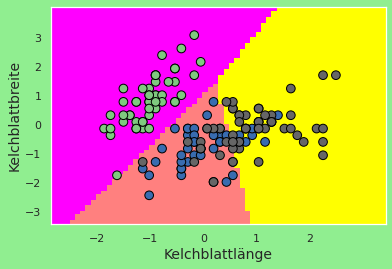

 Accuracy Wert: 0.98


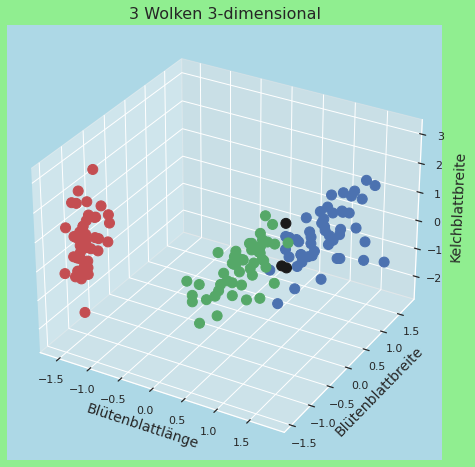

In [5]:
import numpy as np
from sklearn.linear_model import LogisticRegression
#from showborders import visualize_classifier
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'})
def visualize_classifier(classifier,X,y,lab_x="",lab_y=""):
    
    
    min_x, max_x = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0 
    min_y, max_y = X[:, 1].min() - 1.0, X[:, 1].max() + 1.0
    # Define the step size to use in plotting the mesh grid 
    mesh_step_size = .1
 
    # Define the mesh grid of X and Y values 
    x_vals, y_vals = np.meshgrid(np.arange(min_x, max_x, mesh_step_size), np.arange(min_y, max_y, mesh_step_size))
    plt.scatter(x_vals,y_vals,s=1)
    output = classifier.predict(np.c_[x_vals.ravel(), y_vals.ravel()])
    output = output.reshape(x_vals.shape)
    plt.pcolormesh(x_vals, y_vals, output, cmap=plt.cm.spring, shading="auto")


    plt.scatter(X[:, 0], X[:, 1], c=y, s=75, edgecolors='black', linewidth=1, cmap=plt.cm.Accent)
    # Specify the boundaries of the plot 
    plt.xlim(x_vals.min(), x_vals.max()) 
    plt.ylim(y_vals.min(), y_vals.max()) 
 
    # Specify the ticks on the X and Y axes 
    plt.xticks((np.arange(int(X[:, 0].min() - 1), int(X[:, 0].max() + 1), 1.0))) 
    plt.yticks((np.arange(int(X[:, 1].min() - 1), int(X[:, 1].max() + 1), 1.0))) 
    plt.xlabel(lab_x,fontsize=14)
    plt.ylabel(lab_y,fontsize=14)
    plt.show()
    return

logreg = LogisticRegression(C=1e4,max_iter=10000)
logreg.fit(X[:,:2], y)

visualize_classifier(logreg,X,y,"Kelchblattlänge","Kelchblattbreite")
logreg.fit(X,y)
print(f" Accuracy Wert: {logreg.score(X,y)}")
Z=logreg.predict(X)
y[Z!=y]=3

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('Blütenblattlänge',fontsize=14)
ax.set_ylabel('Blütenblattbreite',fontsize=14)
ax.set_zlabel('Kelchblattbreite',fontsize=14)

colormap = np.array(['r', 'g', 'b', 'k'])

ax.scatter(X[:,2], X[:,3],X[:,1] ,s=100, c=colormap[y], marker="o",alpha=1.0) #die Farben richten sich nach dem y Wert

plt.title("3 Wolken 3-dimensional",fontsize=16)
plt.show()

Die falsch klassifizierten Beispiele sind schwarz eingefärbt. Nur 4 von 150 wurden falsch klassifiziert! Hier noch einmal in 2D.

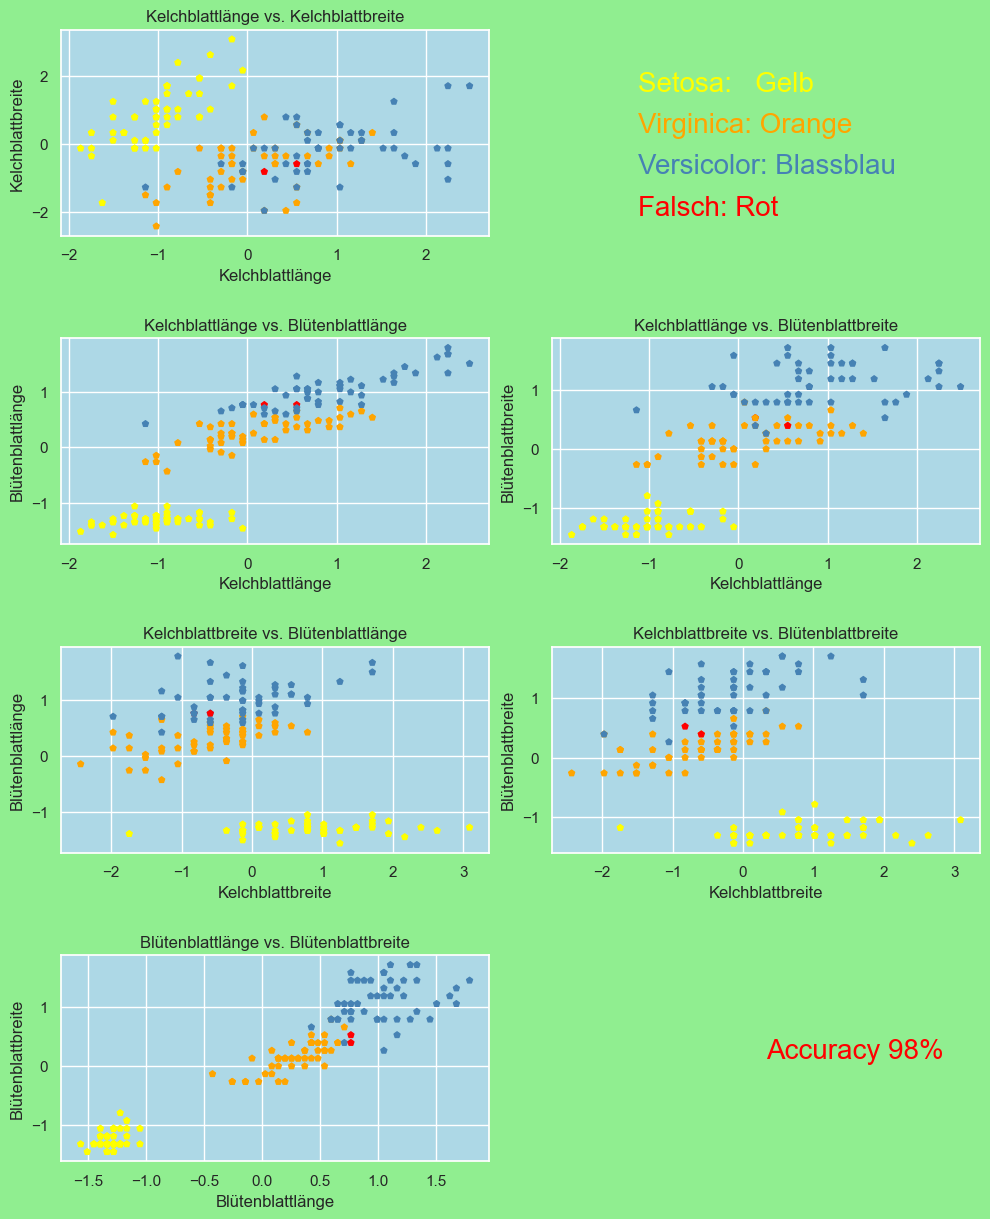

In [9]:
fig, ax = plt.subplots(4, 2, figsize=(10,12)) ##figsize bestimmt eine identische Größe für alle Einzelplots
 

fig.tight_layout()
fig.subplots_adjust(hspace=.5) ### genug Abstand um alle Achsen mit Beschriftung abzubilden ###

colormap=np.array(["yellow","orange","steelblue","red"])
plt.subplot(4,2,1) 
plt.scatter(X[:,0], X[:,1], s=20, c=colormap[y], marker="p") 
plt.title("Kelchblattlänge vs. Kelchblattbreite")
plt.xlabel("Kelchblattlänge")
plt.ylabel("Kelchblattbreite")

plt.subplot(4,2,2) 
plt.text(.2,.7,"Setosa:   Gelb",fontsize=20,color="yellow")
plt.text(.2,.5,"Virginica: Orange",fontsize=20,color="orange")
plt.text(.2,.3,"Versicolor: Blassblau",fontsize=20,color="steelblue")
plt.text(.2,.1,"Falsch: Rot",fontsize=20,color="red")
plt.axis("off")

plt.subplot(4,2,3)
plt.scatter(X[:,0], X[:,2], s=20, c=colormap[y], marker="p") 
plt.title("Kelchblattlänge vs. Blütenblattlänge")
plt.xlabel("Kelchblattlänge")
plt.ylabel("Blütenblattlänge")

plt.subplot(4,2,4) 
plt.scatter(X[:,0], X[:,3], s=20, c=colormap[y], marker="p") 
plt.title("Kelchblattlänge vs. Blütenblattbreite")
plt.xlabel("Kelchblattlänge")
plt.ylabel("Blütenblattbreite")

plt.subplot(4,2,5) 
plt.scatter(X[:,1], X[:,2], s=20, c=colormap[y], marker="p") 
plt.title("Kelchblattbreite vs. Blütenblattlänge")
plt.xlabel("Kelchblattbreite")
plt.ylabel("Blütenblattlänge")

plt.subplot(4,2,6) 
plt.scatter(X[:,1], X[:,3], s=20, c=colormap[y], marker="p") 
plt.title("Kelchblattbreite vs. Blütenblattbreite")
plt.xlabel("Kelchblattbreite")
plt.ylabel("Blütenblattbreite")

plt.subplot(4,2,7) 
plt.scatter(X[:,2], X[:,3], s=20, c=colormap[y], marker="p") 
plt.title("Blütenblattlänge vs. Blütenblattbreite")
plt.xlabel("Blütenblattlänge")
plt.ylabel("Blütenblattbreite")

plt.subplot(4,2,8)
plt.text(.5,.5,"Accuracy 98%",fontsize=20,color="red")
plt.axis("off")
plt.show()

Wie können wir unseren Versuch werten?<br>
Zuächst ist es erstaunlich, daß wir mit unserem Modell so gut abschneiden. Aber:<br>
Es handelt sich nicht wirklich um überwachtes Lernen, Testdaten gibt es nicht, wie das Modell abschneiden würde, wenn es mit unbekannten Daten konfrontiert würde, wissen wir nicht, da das Iris-Datenset auf 150 Samples beschränkt ist.
Wir könnten das Gesamtdatenset natürlich aufteilen in Trainings- und Testdatensätze. Dies werden wir aber jetzt für größere Datensets machen, hier ging es nur um eine Einführung. <br>
Die Art, wie mit sklearn gearbeitet wird, ist immer ähnlich:<br>
Es wird ein Objekt angelegt, wie ein Skalierer oder ein logistischer Regressor mit den notwendigen Parametern. Dann werden die Daten mit ```fit``` diesem Objekt übergeben, welches sie dann anpasst. Danach können wir dann das Ergebnis verwenden, um mit ```predict``` Voraussagen treffen zu können.<br>
Nach der Präparation der Daten ist das Durchführen des Lernalgorithmus meist denkbar einfach, aber es ist nicht sehr transparent, was im Einzelnen dabei passiert.
<br> Hyperparameter erklären sich nicht immer von selbst, hier muß die Dokumentation bemüht werden. In unserem Fall haben wir den Parameter "max_iter", der selbsterklärend ist, aber auch "C".<br>
Hierfür lesen wir in der Dokumentation:<br> "C float, default=1.0
Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization." Bedeuten tut dieses, daß mit höheren Werten von C die Entscheidungsgrenzen so gelegt werden, daß falsche Zuordnungen in Einzelfällen eher erlaubt werden, wenn die Gesamtgenbauigkeit steigt.<br> Nicht unmittelbar verständlich. Erst bei einem Wert von <10 ergibt sich in unserem Modell ein Anstieg der Fehler auf 3. Diese Hyperparameter muß man durch verschiedene Testdurchläufe des Modells optimieren.


Wir möchten nun einen Klassifikator programmieren für das Erkennen handschriftlicher Buchstaben.

Hierzu verwenden wir die MNIST Datei, die 70000 handschriftliche Ziffern enthält. Es hnadelt sich jeweils um eine Ziffer von 0 bis 10. Diese ist in einem Feld von 28 x 28 pixel gespeichert, wobei jedes pixel einen Grauwert enthält von 0 bis 255, 0 bedeutet dabei perfekt weiß, 255 total schwarz. 8 Beispiele sind hier dargestellt. 

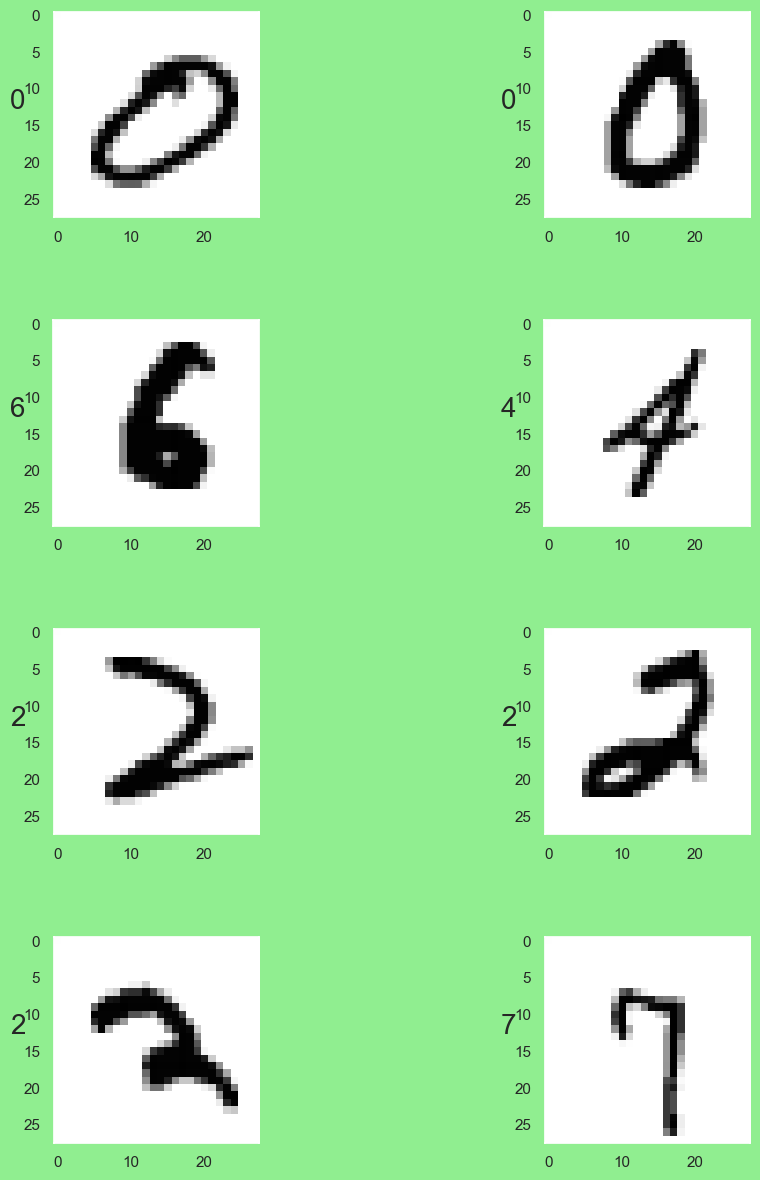

In [11]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import random

def show_image(X,num):
    the_pixels=X_train[num]
    z=[]
    for i in range (28):
        line=[]
        for j in range(28):
            line.append((255-the_pixels[i*28+j]))
            
        z.append(line)        
    z=np.array(z)    
    plt.imshow(z,cmap="gray")
    plt.grid(False)
    return plt
    

with  open("Data/mnist_train_x","rb") as fh:
    X_train=pickle.load(fh)
with  open("Data/mnist_test_x","rb") as fh:
    X_test=pickle.load(fh)
with  open("Data/mnist_train_y","rb") as fh:
    Y_train=pickle.load(fh)
with  open("Data/mnist_test_y","rb") as fh:
    Y_test=pickle.load(fh)

examp_list=[]
for _ in range(17):
    examp_list.append(random.randint(0,59999))
###Zeichne 8 Beispiele    
fig, ax = plt.subplots(4, 2, figsize=(10,12)) 
fig.tight_layout()
fig.subplots_adjust(hspace=.5) 
for i in range(1,9):
    plt.subplot(4,2,i)
    plt.ylabel(Y_train[examp_list[i-1]][0],rotation="horizontal",fontsize=20)
    show_image(X_train,examp_list[i-1])
plt.show()



Wir werden jetzt einen logistischen Klassifikator auf die Daten anwenden. Wegen der langen Laufzeit zeigen wir hier das fertige Ergebnis eines anderen Laufs.

In [14]:
import random
random.seed(1)
def show_image(X,num):
    the_pixels=X_test[num]
    z=[]
    for i in range (28):
        line=[]
        for j in range(28):
            line.append((255-the_pixels[i*28+j]))
        z.append(line)        
    z=np.array(z)    
    plt.imshow(z,cmap="gray")
    plt.grid(False)
    return plt

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e3,max_iter=10000)
Y_train=Y_train.reshape(60000,)
train_len=3000
test_len=7000
f_X_train=X_train[:train_len]
f_Y_train=Y_train[:train_len]
f_X_test=X_test[train_len:train_len+test_len]
f_Y_test=Y_test[train_len:train_len+test_len]

logreg.fit(f_X_train, f_Y_train)
Z=logreg.predict(f_X_test)
Z=Z.reshape(test_len,1)
fehler=np.where(Z!=f_Y_test)[0]

with  open("Data/mnist_train_x","rb") as fh:
    X_train=pickle.load(fh)
with  open("Data/mnist_test_x","rb") as fh:
    X_test=pickle.load(fh)
with  open("Data/mnist_train_y","rb") as fh:
    Y_train=pickle.load(fh)
with  open("Data/mnist_test_y","rb") as fh:
    Y_test=pickle.load(fh)
    
examp_list=[]
for _ in range(9):
    examp_list.append(fehler[random.randint(0,fehler.size)])


# ###Zeichne 8 Beispiele    
# fig, ax = plt.subplots(4, 2, figsize=(10,12)) 
# fig.tight_layout()
# fig.subplots_adjust(hspace=.5)

# for i in range(1,9):
#     plt.subplot(4,2,i)
#     plt.ylabel(f"{Z[examp_list[i-1]][0]} sollte sein: {f_Y_test[examp_list[i-1]][0]}",rotation="horizontal",fontsize=20,loc="top")
#     show_image(f_X_test,examp_list[i-1])
# plt.show()
print(f"Genauigkeit (Accuracy) : {100-(fehler.size/test_len*100)}")

Genauigkeit (Accuracy) : 88.78571428571429


Mit der gesamten Datei von 60000 Datensätzen zum Lernen liegen wir bei 92.5 Prozent. Dies benötigt aber auch schon nenneswerte Laufzeit.
Ein Teilergebnis zeigt, daß zum Teil auch wir als Menschen mit manchen Datensätzen Schwierigkeiten hätten:<br><br><img width=500 height=500 class="imgright" src="Images/Ergebnis_MNIST.png"><br><br> Durch Variation der Hyperparameter "C" und "max_iter" steigern wir das Ergebnis ebenfalls nicht nennenswert. Wir möchten nun zeigen, wie mir mit einer Fehlermatrix (oder Konfusionmatrix) weitere Informationen über unseren Klassifizierer bekommen können. Dunkle Felder bedeuten hohes Maß an richtiger Klassifizierung. Wir haben den Maximalwert beschnitten im Plot, da sonst die Unterschiede für die fehlerhaften
Zuordnungen im Vergleich zur Diagonale mit richtigen Vorhersagen untergehen.

Vor Beschneiden auf 50
[[674   0   5   3   3   5  14   0   5   6]
 [  0 768   8   1   2   6   0   8   8   2]
 [  8   3 624  21   3   4  12  16   7   3]
 [  4   2  22 607   0  25   1   6  22  11]
 [  0   1  10   0 610  12  10   3  18  35]
 [  5   2   5  29   2 510  25   0  34  16]
 [  8   3   7   0   7   9 618   1  21   1]
 [  5   1   9   8   4   7   4 659  14  36]
 [  5  14  19  18   7  25   2   3 548   7]
 [  0   1  10   7  26   6   0  26  11 597]]


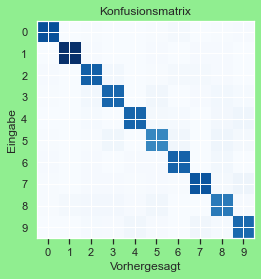

In [15]:
from matplotlib import pylab #lange Laufzeit , benötigt Zelle davor
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Z,f_Y_test)
print("Vor Beschneiden auf 50")
print(cm)
pylab.clf()
ax=pylab.axes()
pylab.title("Konfusionsmatrix")
pylab.matshow(cm,cmap="Blues",fignum=False,vmin=0.)#,vmax=50)
pylab.xlabel("Vorhergesagt")
pylab.ylabel("Eingabe")
ax.set_xticks(range(10))
ax.xaxis.set_ticks_position("bottom")
ax.set_yticks(range(10))
x="" ######um out zu unterdrücken


Nach Beschneiden auf 50


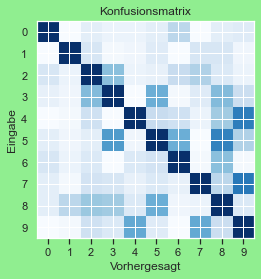

In [16]:
print("Nach Beschneiden auf 50")

pylab.clf()
ax=pylab.axes()
pylab.title("Konfusionsmatrix")
pylab.matshow(cm,cmap="Blues",fignum=False,vmin=0,vmax=50)
pylab.xlabel("Vorhergesagt")
pylab.ylabel("Eingabe")
ax.set_xticks(range(10))
ax.xaxis.set_ticks_position("bottom")
ax.set_yticks(range(10))
x="" ######um out zu unterdrücken


<br><b>Konfusionsmatrix<br><img width=400 height=400 class="imgright" src="Images/Konfusions_matrix.png"><br><br>

Besonders schlechte Werte erhalten wir für die Unterscheidung von 0 und 1.
Ist logReg der falsche Algorithmus? Wir machen einen Versuch mit einem Support Vektor Klassifizierer. Dieser ist ebenfalls eine häufige Methode des überwachten Lernens. Dabei werden Trennflächen zwischen den einzelnen Klassen im Hyperraum gesucht, die die Daten mit verschiedenen Labeln möglichst gut voneinander abgrenzen. 

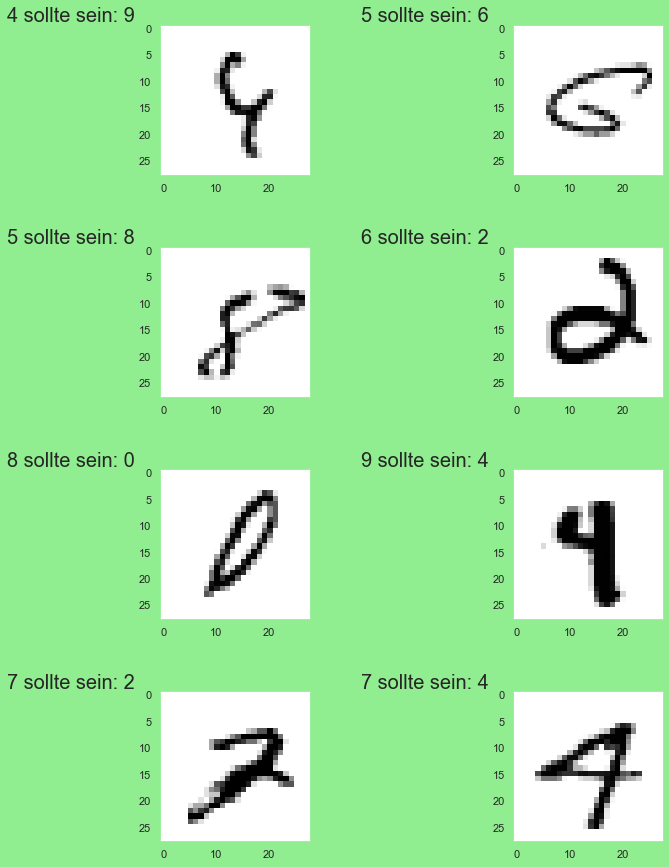

Genauigkeit (Accuracy) : 97.42


In [17]:
####sehr lange Laufzeit################
random.seed(1)
def show_image(X,num):
    the_pixels=X_test[num]
    z=[]
    for i in range (28):
        line=[]
        for j in range(28):
            line.append((255-the_pixels[i*28+j]))
        z.append(line)        
    z=np.array(z)    
    plt.imshow(z,cmap="gray")
    plt.grid(False)
    return plt

from sklearn import svm
svm_clf = svm.SVC()
Y_train=Y_train.reshape(60000,)
train_len=30000
test_len=10000
f_X_train=X_train[:train_len]
f_Y_train=Y_train[:train_len]
f_X_test=X_test[:test_len]
f_Y_test=Y_test[:test_len]

svm_clf.fit(f_X_train, f_Y_train)
Z=svm_clf.predict(f_X_test)
Z=Z.reshape(test_len,1)
fehler=np.where(Z!=f_Y_test)[0]

with  open("Data/mnist_train_x","rb") as fh:
    X_train=pickle.load(fh)
with  open("Data/mnist_test_x","rb") as fh:
    X_test=pickle.load(fh)
with  open("Data/mnist_train_y","rb") as fh:
    Y_train=pickle.load(fh)
with  open("Data/mnist_test_y","rb") as fh:
    Y_test=pickle.load(fh)
    
examp_list=[]
for _ in range(9):
    examp_list.append(fehler[random.randint(0,fehler.size)])


###Zeichne 8 Beispiele    
fig, ax = plt.subplots(4, 2, figsize=(10,12)) 
fig.tight_layout()
fig.subplots_adjust(hspace=.5)

for i in range(1,9):
    plt.subplot(4,2,i)
    plt.ylabel(f"{Z[examp_list[i-1]][0]} sollte sein: {f_Y_test[examp_list[i-1]][0]}",rotation="horizontal",fontsize=20,loc="top")
    show_image(f_X_test,examp_list[i-1])
plt.show()
print(f"Genauigkeit (Accuracy) : {100-(fehler.size/test_len*100)}")

Wir erhalten beachtliche 98 % Genauigkeit obwohl wir nur 30000 Datensätze gelernt haben (aus Zeitgründen), nur 200 Zahlen unseres 10000er Testdatensatzes werden also falsch klassifiziert.
Gar nicht so schlecht! 
Ziel dieses Kapitels war es, das generelle Vorgehen mit sklearn für überwachtes Lernen zu zeigen. Auf die einzelnen Verfahren zum Klassifizieren werden wir im Einzelnen noch genauer eingehen.